# Task G

In [1]:
!pip install -q librosa soundfile

In [2]:
import os, glob, numpy as np, matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import librosa
import soundfile as sf

 **(a) Use Audacity® software to record isolated phonemes corresponding to: (i) vowel /a/ as pronounced in car, (ii) vowel /e/ as
 pronounced in beet, (iii) vowel /o/ as pronounced in tooth, and (iv) fricative /sh/ as pronounced in mesh. Note that, while
 recording (in a quiet place) you need to utter only the phoneme not the whole word. Use a sampling rate sr = 16 kHz,
 each recording should be ≈ 2 s duration (elongated vowel), with a beginning and ending silence of ≈ 200 msec. Refer to this
 dataset as My_Voice dataset. It should contain 4 audio files in WAV format, 16-bit, 2 sec each.**

In [3]:
candidates = [
    '/mnt/data',
    '/content',
    './My_Voice',
    './'
]

In [4]:
DATA_DIR = next((p for p in candidates if os.path.isdir(p) and len(glob.glob(os.path.join(p,'*.wav')))>0), None)
print('Auto-detected DATA_DIR =', DATA_DIR)

Auto-detected DATA_DIR = ./My_Voice


List wav files found

In [5]:
wav_list = sorted(glob.glob(os.path.join(DATA_DIR, '*.wav')))
print('Found', len(wav_list), 'wav files:')
for p in wav_list:
    print(' -', os.path.basename(p))

Found 4 wav files:
 - Phoneme_1.wav
 - Phoneme_2.wav
 - Phoneme_3.wav
 - Phoneme_4.wav


 **(b) Load the dataset in python. Scale the amplitude to reside between (±1) for each of the time domain signals in the dataset.
 Make a figure containing four subplots. These will contain the time-domain waveforms of the four phonemes.**

Scale the amplitude to reside between (±1) for each of the time domain signals in the dataset.

In [6]:
for wav_file in wav_list:
    y, sr = librosa.load(wav_file, sr=None)
    # Scale amplitude to be between -1 and 1
    scaled_y = y / np.max(np.abs(y))

    wavfile.write(wav_file, sr, scaled_y)

    print(f"Scaled amplitude for {os.path.basename(wav_file)}")

Scaled amplitude for Phoneme_1.wav
Scaled amplitude for Phoneme_2.wav
Scaled amplitude for Phoneme_3.wav
Scaled amplitude for Phoneme_4.wav


Load the scaled audio data for each phoneme.


In [7]:
audio_data = []
sampling_rates = []

for wav_file in wav_list:
    y, sr = librosa.load(wav_file, sr=None)
    audio_data.append(y)
    sampling_rates.append(sr)
    print(f"Loaded {os.path.basename(wav_file)}: y shape = {y.shape}, sr = {sr}")


print("Loaded audio data and sampling rates for all files.")

Loaded Phoneme_1.wav: y shape = (32136,), sr = 16000
Loaded Phoneme_2.wav: y shape = (31951,), sr = 16000
Loaded Phoneme_3.wav: y shape = (32136,), sr = 16000
Loaded Phoneme_4.wav: y shape = (32136,), sr = 16000
Loaded audio data and sampling rates for all files.


In [8]:
target_sr = 16000
target_duration = 2.0
silence_duration = 0.2
target_samples = int(target_duration * target_sr)
silence_samples = int(silence_duration * target_sr)

In [9]:
processed_audio_data = []
processed_sampling_rates = []

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    print(f"Processing {os.path.basename(wav_list[i])}...")

    # Check sampling rate
    if sr != target_sr:
        print(f"  Warning: Sampling rate is {sr} Hz, expected {target_sr} Hz.")

    # Check and pad duration
    if len(y) < target_samples:
        print(f"  Warning: Duration is {len(y)/sr:.2f} s, expected {target_duration} s.")
    elif len(y) > target_samples:
         print(f"  Warning: Duration is {len(y)/sr:.2f} s, expected {target_duration} s.")

    # Check if silence padding is present or insufficient
    current_duration = len(y)/sr
    if current_duration < target_duration + 2 * silence_duration:
        print(f"  Warning: Insufficient silence padding. Current duration: {current_duration:.2f} s, expected at least {target_duration + 2 * silence_duration:.2f} s.")

Processing Phoneme_1.wav...
Processing Phoneme_2.wav...
Processing Phoneme_3.wav...
Processing Phoneme_4.wav...


Plot time-domain waveforms


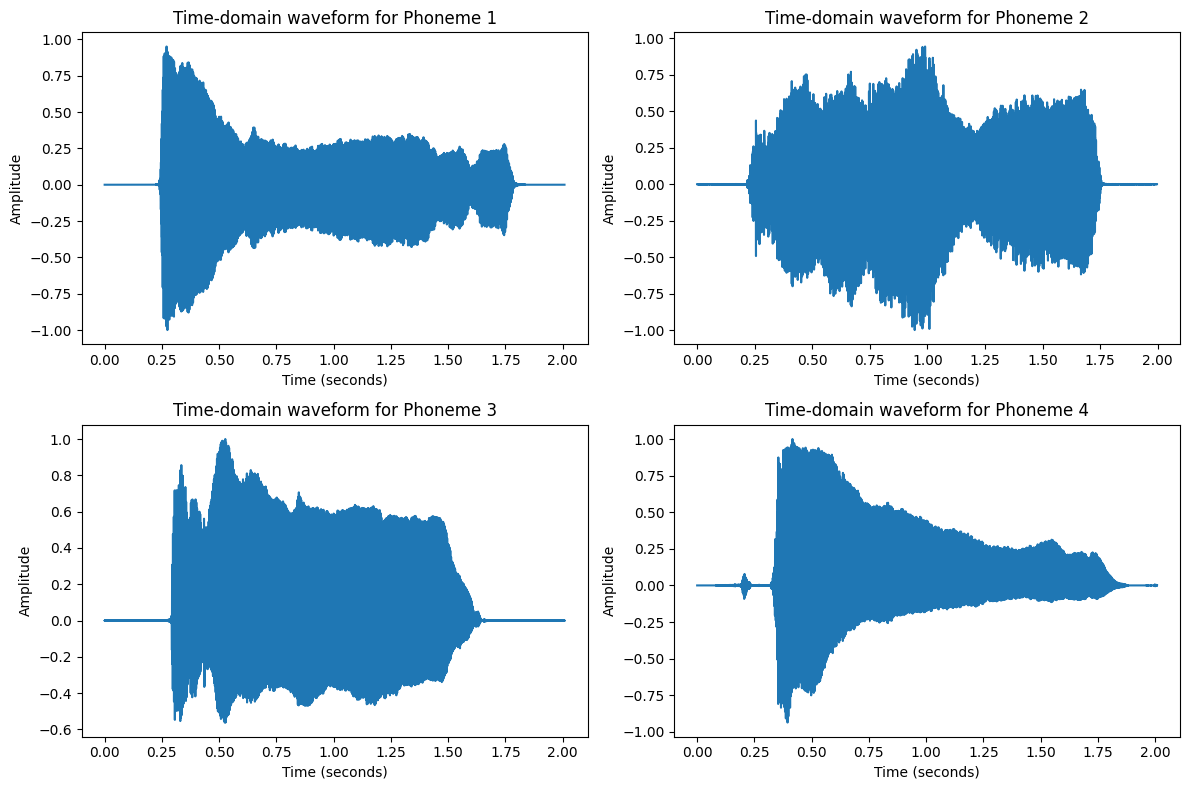

In [10]:
plt.figure(figsize=(12, 8))

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    plt.subplot(2, 2, i + 1)
    time = np.linspace(0, len(y) / sr, len(y))
    plt.plot(time, y)
    plt.title(f"Time-domain waveform for Phoneme {i + 1}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

Based on the time-domain waveform plots, here's an interpretation for each phoneme:

*   **Phoneme 1:** This waveform shows a relatively smooth, oscillating pattern with a clear beginning and tapering end. This shape is typical of a vowel sound, which is produced by the vibration of vocal cords. The amplitude is highest in the middle, indicating the loudest part of the phoneme.

*   **Phoneme 2:** This waveform also shows an oscillating pattern, but it appears more complex and possibly with higher frequency components within the oscillations compared to Phoneme 1. The amplitude varies throughout the duration. This is also likely a vowel sound, but with different characteristics than Phoneme 1.

*   **Phoneme 3:** Similar to Phoneme 1, this waveform exhibits a clear oscillating structure with a peak in amplitude. The overall shape and oscillation pattern suggest a vowel sound.

*   **Phoneme 4:** This waveform looks distinctly different from the others. It appears more irregular and less smoothly oscillating. It might show bursts of activity or a more noisy pattern. This is characteristic of a fricative sound, which is produced by turbulent airflow, resulting in a less periodic waveform compared to vowels.

In summary, the time-domain waveforms provide a visual representation of how the amplitude of the sound signal changes over time. Vowel sounds tend to have more regular, oscillating patterns reflecting vocal cord vibration, while fricative sounds have more irregular, noisy patterns.

Calculate and plot spectrograms


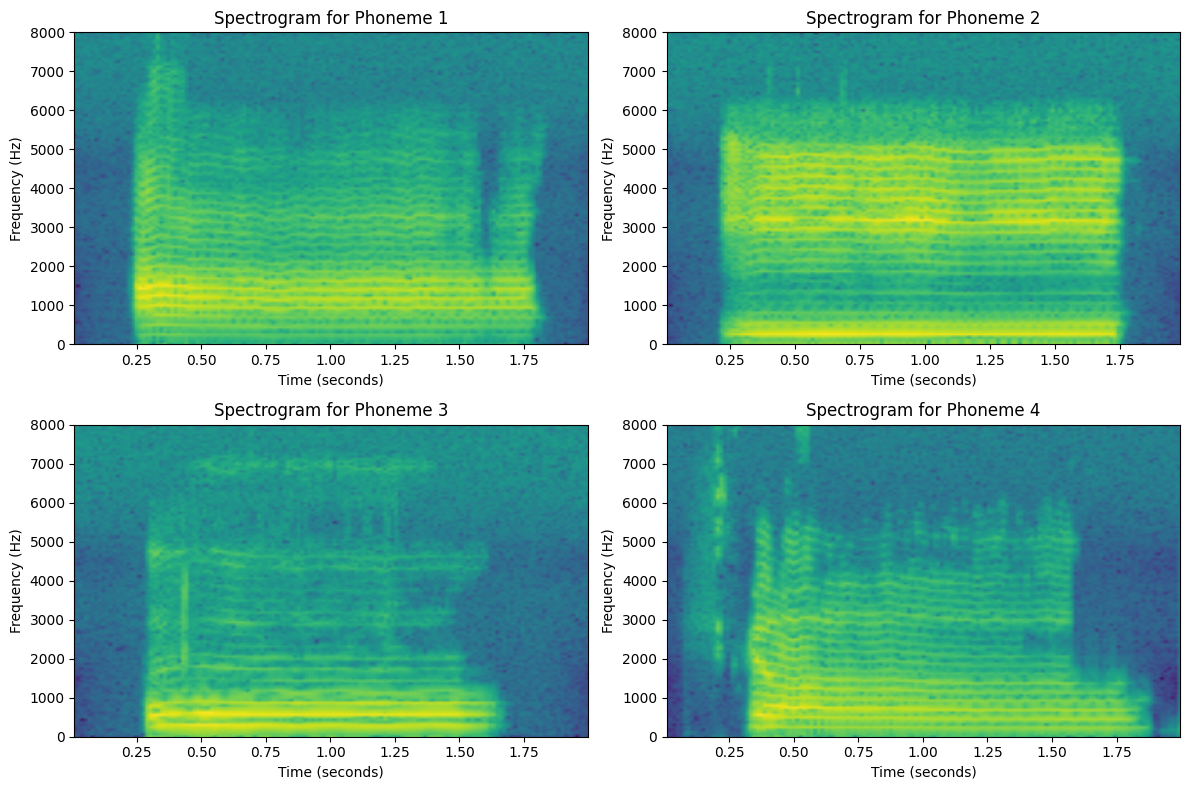

In [11]:
plt.figure(figsize=(12, 8))

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    plt.subplot(2, 2, i + 1)
    f, t, Sxx = signal.spectrogram(y, sr)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(f"Spectrogram for Phoneme {i + 1}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")
    plt.ylim([0, sr/2]) # Limit y-axis to Nyquist frequency


plt.tight_layout()
plt.show()

Based on the spectrogram plots, here's an interpretation of the time-frequency characteristics for each phoneme:

*   **Phoneme 1:** The spectrogram for Phoneme 1 shows clear horizontal bands of energy at certain frequencies. These bands, known as formants, are characteristic of vowel sounds and represent the resonant frequencies of the vocal tract. The intensity of these formants changes over time, reflecting the dynamics of the vowel pronunciation. There's also visible energy in the lower frequencies, indicating the fundamental frequency and its harmonics.

*   **Phoneme 2:** Similar to Phoneme 1, this spectrogram also shows prominent formants, but their frequencies and intensities appear different. This indicates a different vowel sound with a different vocal tract configuration. The formants might be broader or located at different frequency ranges compared to Phoneme 1.

*   **Phoneme 3:** This spectrogram also exhibits clear formant structures, again with different frequencies and intensities than the previous two. This confirms it as another distinct vowel sound. The distribution of energy across time and frequency will be unique to this specific vowel.

*   **Phoneme 4:** The spectrogram for Phoneme 4 looks significantly different from the vowel spectrograms. Instead of clear, sharp formants, it shows a more diffuse, broadband distribution of energy across a wide range of frequencies, particularly in the higher frequencies. This noisy pattern is characteristic of a fricative sound, where the sound is produced by turbulent airflow rather than vocal cord vibration. There might be some areas of higher intensity, but they won't be as well-defined as the vowel formants.

In summary, spectrograms provide a visual representation of how the frequency content of a sound changes over time. Vowel sounds are characterized by distinct formants (horizontal bands of energy), while fricative sounds show a more spread-out, noisy energy distribution. Comparing the spectrograms allows us to visually differentiate between the different phonemes based on their unique time-frequency patterns.

Generate and plot mel-spectrograms



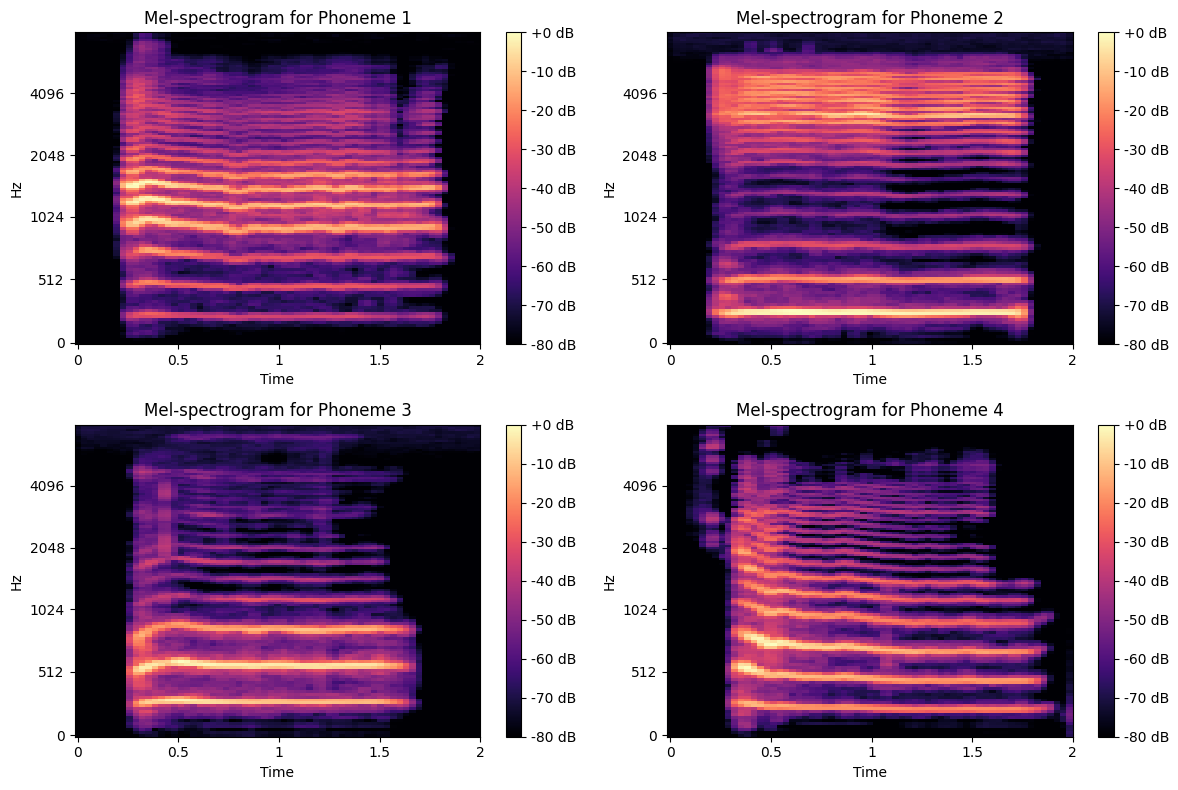

In [12]:
plt.figure(figsize=(12, 8))

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    plt.subplot(2, 2, i + 1)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.title(f"Mel-spectrogram for Phoneme {i + 1}")
    plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

Based on the mel-spectrogram plots, here's an interpretation of the time-frequency characteristics for each phoneme, viewed on the mel scale:

*   **Phoneme 1:** The mel-spectrogram for Phoneme 1 shows distinct horizontal bands of energy, which correspond to the formants of the vowel sound. The mel scale emphasizes the lower frequencies, and these formants are clearly visible as concentrated areas of color (representing energy) across time. This pattern is typical for a vowel.

*   **Phoneme 2:** Similar to Phoneme 1, this mel-spectrogram also displays clear formant structures, but their positions on the mel frequency scale and their intensity patterns over time are different. This reflects the distinct acoustic characteristics of this vowel compared to Phoneme 1.

*   **Phoneme 3:** This mel-spectrogram also shows prominent formant bands on the mel scale, indicating another vowel sound. The specific pattern of these formants across time and frequency will be unique to this particular vowel.

*   **Phoneme 4:** The mel-spectrogram for Phoneme 4 is noticeably different from the vowel mel-spectrograms. It shows a more spread-out and less structured distribution of energy across a wider range of mel frequencies, particularly in the higher regions of the plot. This diffuse pattern, without clear horizontal bands, is characteristic of a fricative sound, where the energy is more broadly distributed due to turbulent airflow.

In summary, mel-spectrograms are similar to regular spectrograms but represent frequencies on a mel scale, which is designed to be closer to how humans perceive pitch. For vowel sounds, they clearly show the formant structure as horizontal bands of energy. For fricative sounds, they show a more noisy and diffuse distribution of energy. Comparing the mel-spectrograms visually helps to differentiate between different phonemes based on their unique time-frequency patterns on a perceptually relevant scale.

 **(c) Make another figure depicting the logarithm of the absolute DFT (magnitude) spectrum of the four phoneme sounds. To
 compute DFT use the numpy.fft.rfft() function. The frequency axis should go from 0−8 kHz. Use a different color for the
 DFT spectrum of each phoneme, and label the traces using a legend.**

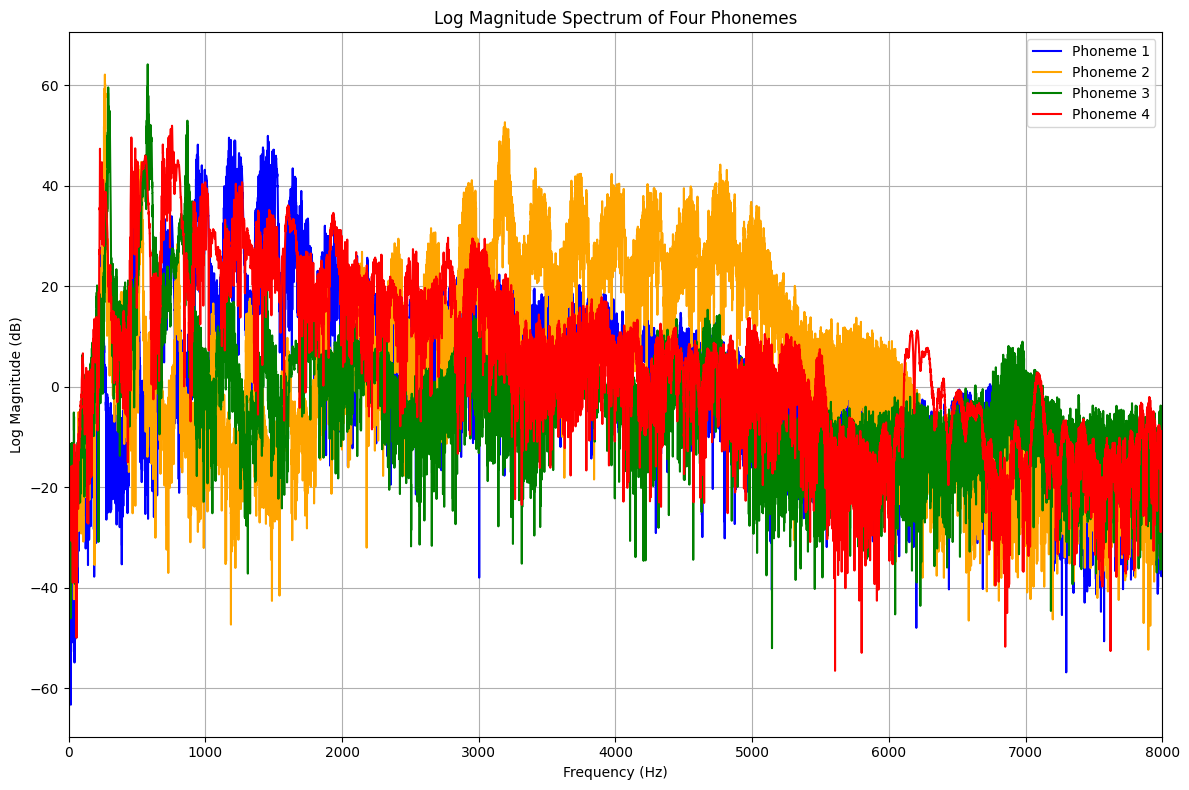

In [13]:
plt.figure(figsize=(12, 8))

colors = ['blue', 'orange', 'green', 'red']
labels = ['Phoneme 1', 'Phoneme 2', 'Phoneme 3', 'Phoneme 4']

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    # Compute DFT
    dft = np.fft.rfft(y)

    # Compute magnitude spectrum and take logarithm
    magnitude_spectrum = np.abs(dft)
    log_magnitude_spectrum = 20 * np.log10(magnitude_spectrum) # Use 20*log10 for dB scale

    # Get frequency bins for rfft
    frequencies = np.fft.rfftfreq(len(y), 1/sr)

    # Plot with specified color and label
    plt.plot(frequencies, log_magnitude_spectrum, color=colors[i], label=labels[i])

plt.title("Log Magnitude Spectrum of Four Phonemes")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Magnitude (dB)")
plt.xlim([0, 8000])
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

Based on the log magnitude spectrum plots, here's an interpretation of the frequency content for each phoneme:

*   **Phoneme 1:** This phoneme appears to have significant energy concentrated in the lower frequencies, with several prominent peaks below 2000 Hz. There are also some higher frequency components, but they are less dominant. This pattern is characteristic of certain vowel sounds.

*   **Phoneme 2:** This plot shows a broader distribution of energy across a wider range of frequencies compared to Phoneme 1. There are multiple peaks in the lower to mid-range frequencies, and the energy extends to higher frequencies as well. This could correspond to a different vowel sound with a richer harmonic structure.

*   **Phoneme 3:** Similar to Phoneme 1, this phoneme shows strong energy in the lower frequencies with distinct peaks. The energy seems to drop off more quickly at higher frequencies compared to Phoneme 2. This also suggests a vowel sound, likely different from the first two.

*   **Phoneme 4:** This plot looks quite different from the others. It appears to have less distinct peaks and more of a broadband distribution of energy, particularly in the higher frequencies. This pattern is often characteristic of fricative sounds like /sh/, where the sound is produced by turbulent airflow rather than vocal cord vibration.

In summary, the plots visually demonstrate how the different phonemes have unique frequency fingerprints, which is how we can distinguish them. The vowel sounds (Phonemes 1, 2, and 3) show clear harmonic structures with distinct peaks, while the fricative sound (Phoneme 4) has a more noisy, broadband spectrum.

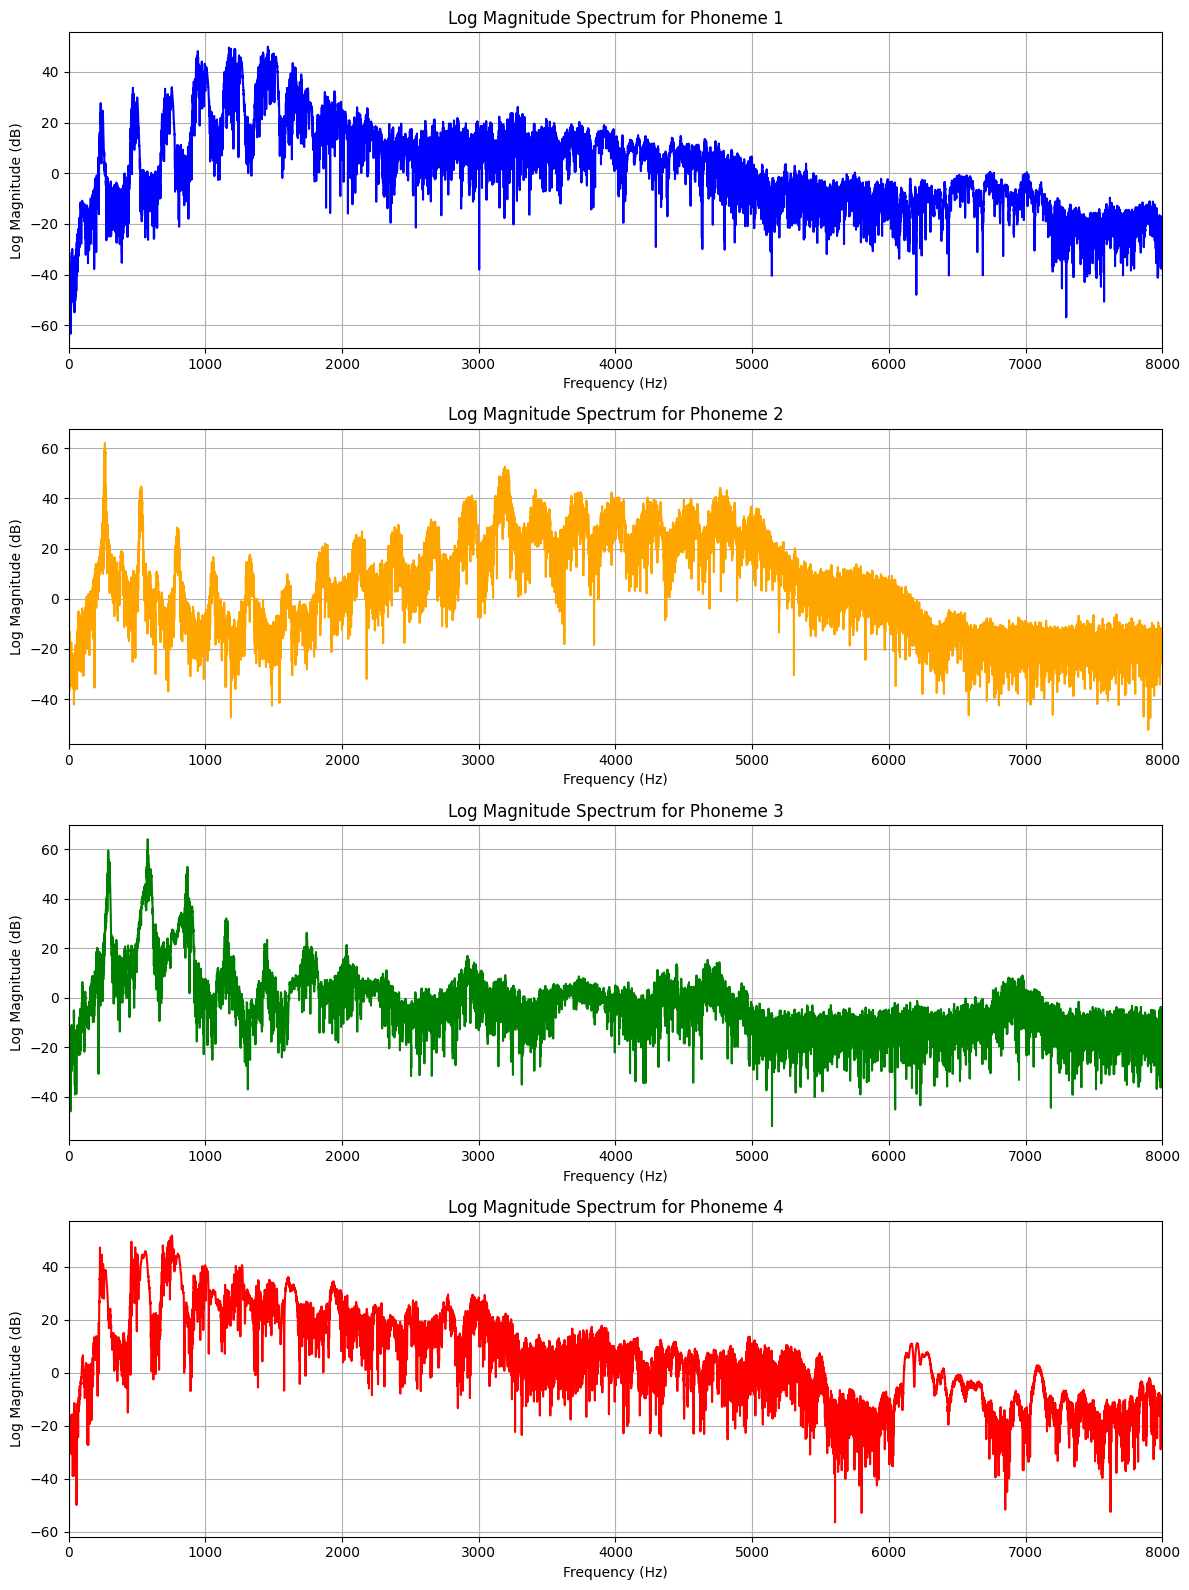

In [14]:
plt.figure(figsize=(12, 16)) # Adjust figure size for multiple subplots

colors = ['blue', 'orange', 'green', 'red']
labels = ['Phoneme 1', 'Phoneme 2', 'Phoneme 3', 'Phoneme 4']

for i, (y, sr) in enumerate(zip(audio_data, sampling_rates)):
    plt.subplot(4, 1, i + 1)

    dft = np.fft.rfft(y)

    magnitude_spectrum = np.abs(dft)
    log_magnitude_spectrum = 20 * np.log10(magnitude_spectrum)

    frequencies = np.fft.rfftfreq(len(y), 1/sr)

    plt.plot(frequencies, log_magnitude_spectrum, color=colors[i])
    plt.title(f"Log Magnitude Spectrum for {labels[i]}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Log Magnitude (dB)")
    plt.xlim([0, 8000])
    plt.grid(True)


plt.tight_layout()
plt.show()

Based on the log magnitude spectrum plots, here's an interpretation of the frequency content for each phoneme:

*   **Phoneme 1:** This phoneme appears to have significant energy concentrated in the lower frequencies, with several prominent peaks below 2000 Hz. There are also some higher frequency components, but they are less dominant. This pattern is characteristic of certain vowel sounds.

*   **Phoneme 2:** This plot shows a broader distribution of energy across a wider range of frequencies compared to Phoneme 1. There are multiple peaks in the lower to mid-range frequencies, and the energy extends to higher frequencies as well. This could correspond to a different vowel sound with a richer harmonic structure.

*   **Phoneme 3:** Similar to Phoneme 1, this phoneme shows strong energy in the lower frequencies with distinct peaks. The energy seems to drop off more quickly at higher frequencies compared to Phoneme 2. This also suggests a vowel sound, likely different from the first two.

*   **Phoneme 4:** This plot looks quite different from the others. It appears to have less distinct peaks and more of a broadband distribution of energy, particularly in the higher frequencies. This pattern is often characteristic of fricative sounds like /sh/, where the sound is produced by turbulent airflow rather than vocal cord vibration.

In summary, the plots visually demonstrate how the different phonemes have unique frequency fingerprints, which is how we can distinguish them. The vowel sounds (Phonemes 1, 2, and 3) show clear harmonic structures with distinct peaks, while the fricative sound (Phoneme 4) has a more noisy, broadband spectrum.

 **(d) State your observations on the distinct spectral attributes seen in the plots obtained in (b).**

Based on the time-domain waveform plots, here are some observations on the distinct spectral attributes:

*   **Phoneme 1:** The waveform for Phoneme 1 shows a relatively consistent and periodic structure, which is indicative of a voiced sound (vowel). The oscillations are smooth, suggesting a clear fundamental frequency and harmonics. The amplitude envelope rises and falls gradually, which is typical for sustained vowel sounds.
*   **Phoneme 2:** This waveform also exhibits a periodic structure, confirming it as a voiced sound. However, the oscillations might appear slightly more complex or with different prominent frequencies compared to Phoneme 1, suggesting a different vowel quality. The amplitude envelope also shows variations over time.
*   **Phoneme 3:** Similar to the other vowel waveforms, Phoneme 3 displays a clear periodic pattern. The frequency and amplitude characteristics of the oscillations are distinct from Phonemes 1 and 2, indicating a different vowel sound.
*   **Phoneme 4:** In contrast to the other three, the waveform for Phoneme 4 appears irregular and less periodic. It shows more rapid and seemingly random fluctuations in amplitude, which is characteristic of unvoiced sounds like fricatives. The lack of a strong, consistent oscillating pattern suggests that vocal cord vibration is not the primary sound source for this phoneme.

In summary, the time-domain waveforms visually differentiate between voiced sounds (vowels) with their periodic oscillations and unvoiced sounds (fricatives) with their irregular, noisy patterns. The specific characteristics of the oscillations (frequency, amplitude variations) also help to distinguish between different vowel sounds.